# Проверка гипотез для увеличения выручки

**Цель:** проверить текущие гипотезы и выявить наиболее перспективные для увеличения выручки крупного интернет-магазина.

**Ход исследования:**
1. Приоритизация гипотез
2. Анализ результатов проведенного A/B тестирования за один месяц (август 2019 года) 
3. Формулировка выводов и рекомендаций

### Приоритизация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import scipy.stats as stats

In [2]:
data = pd.read_csv('hypothesis.csv')

#на всякий случай проверим типы данных - все правильно
data.info()

#приведем названия столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()

#и посмотрим на данные
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3 

**Текущие гипотезы:** 

0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1. Запустить собственную службу доставки, что сократит срок доставки заказов
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8. Запустить акцию, дающую скидку на товар в день рождения


Данные выглядят адекватно и не нуждаются в дополнительной предобработке. 
Приоритизуем гипотезы одним из самых популярных способов - ICE и его модификацией - RICE, посмотрим, как это повлияет на результаты. 

ICE оценивает гипотезы с точки зрения степени влияния на пользователей, затраченных ресурсов, а также нашей уверенности в точности этих оценок. RICE еще дополнительно учитывает охват посетителей, которых затронет принятое изменение.

In [3]:
data['ICE'] = round(data['impact'] * data['confidence']/data['efforts'], 2)

print(data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                          hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


In [4]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']

print(data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


ТОП лучших гипотез по фреймворку ICE (номера гипотез сохранены из списка Текущих гипотез):

8. Запустить акцию, дающую скидку на товар в день рождения
0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

ТОП лучших гипотез по фреймворку RICE: 

7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Некоторые гипотезы и там, и там оказались в конце:
1. Запустить собственную службу доставки, что сократит срок доставки заказов
3. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

Как и ожидалось, результаты немного разные, потому что во втором случае учитывается охват пользователей, на которых повлияет данное изменение. 

Рекомендация: выбрать для дальнейшей проверки гипотезы 7, 0 и 6. Если есть дополнительные ресурсы, можно взять еще гипотезы 2 и 8. 

### A/B тестирование

#### Подготовка данных

In [5]:
orders = pd.read_csv('orders.csv')

print(orders.head())
print(' ')

#переименуем столбцы, чтобы было удобнее обращаться к ним
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

orders.info()

#переведем дату в нужный формат
orders['date'] = pd.to_datetime(orders['date'] )

#проверяем дубликаты 
orders.duplicated().value_counts()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


False    1197
dtype: int64

In [6]:
visitors = pd.read_csv('visitors.csv')

#проверяем названия столбцов
print(visitors.head())
print(' ')
visitors.info()

#переведем дату в нужный формат
visitors['date'] = pd.to_datetime(visitors['date'] )

#проверяем дубликаты 
visitors.duplicated().value_counts()

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


False    62
dtype: int64

Данные полные: пропусков и дубликатов нет. Поправили только названия столбцов для удобства и привели даты к нужному формату. 

#### Анализ A/B тестирования

In [7]:
#найдем уникальные пары дат и группы
dates_groups = orders[['date','group']].drop_duplicates() 

#получим агрегированные данные по заказам и визитам: количество уникальных заказов и посетителей и сумма среднего чека
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

#объединяем таблицы
final_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
final_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
final_data['conversion'] = final_data['orders']/final_data['visitors']

print(final_data.head(5)) 

        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      24      20   148579       719    0.033380
1 2019-08-01     B      21      20   101217       713    0.029453
2 2019-08-02     A      44      38   242401      1338    0.032885
3 2019-08-02     B      45      43   266748      1294    0.034776
4 2019-08-03     A      68      62   354874      1845    0.036856


In [8]:
#проверим, не попали ли какие-то пользователи в обе группы
orders[['visitor_id', 'group']].count() - orders[['visitor_id', 'group']].drop_duplicates().count()

visitor_id    108
group         108
dtype: int64

В данных оказалось 108 пользователей, которые по ошибке попали в обе группы. Число достаточно большое, вероятно, есть смысл перед проведением тестирования исключить такую ошибку, иначе результаты не смогут быть интерпретированы однозначно (непонятно, какая именно версия повлияла на решение посетителя).

##### Кумулятивные метрики

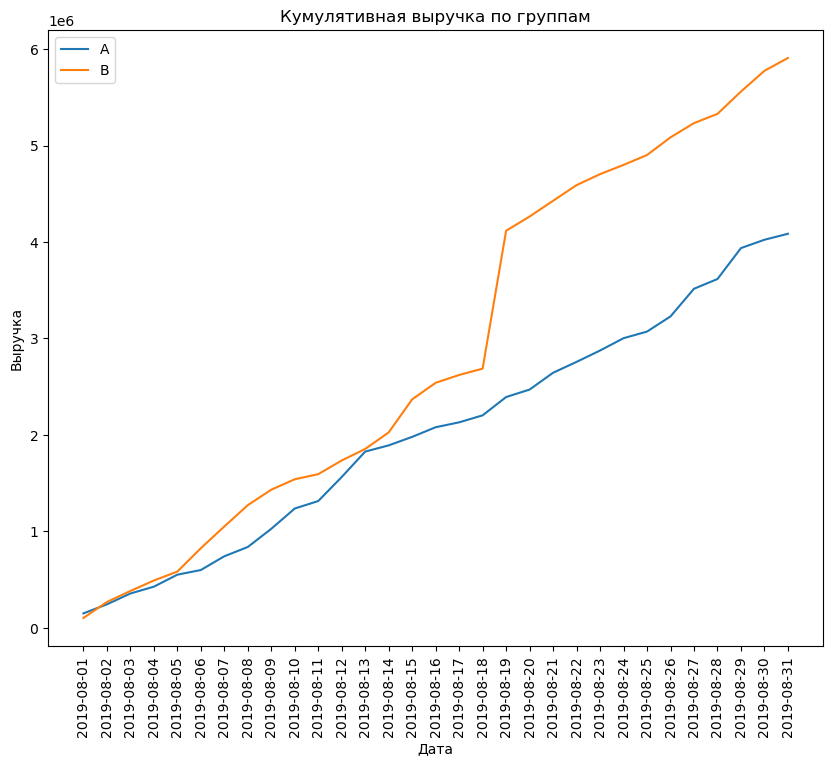

In [9]:
#разобьем данные по группам для анализа
cumulative_A = final_data[final_data['group']=='A']
cumulative_B = final_data[final_data['group']=='B']

#построим график кумулятивной выручки по группам
plt.figure(figsize = (10,8))
plt.plot(cumulative_A['date'], cumulative_A['revenue'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['revenue'], label='B')


plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()


Выручка в обеих группах растет, группа B выше на протяжении всего периода. Также у нее наблюдается резкий скачок примерно в середине месяца. Это может говорить об увеличении числа заказов, либо их удорожании. 

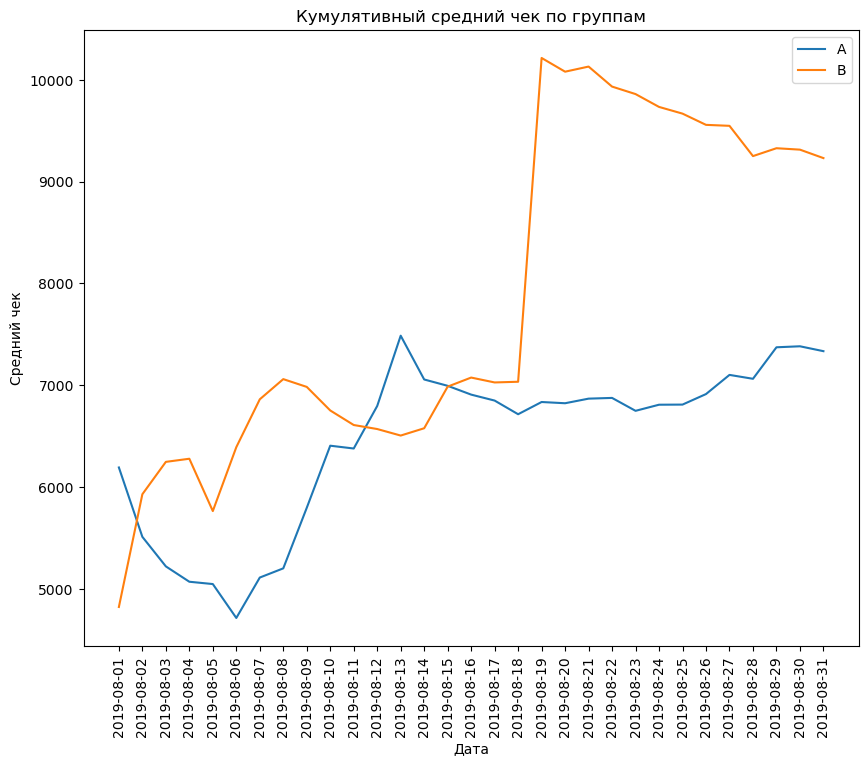

In [10]:
#построим график кумулятивного среднего чека по группам
plt.figure(figsize = (10,8))
plt.plot(cumulative_A['date'], cumulative_A['revenue']/cumulative_A['orders'], label = 'A')
plt.plot(cumulative_B['date'], cumulative_B['revenue']/cumulative_B['orders'], label = 'B')

plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()

Средний чек также растет, однако более хаотично. Группа B преимущественно выше группы A, за исключением нескольких дней. 
Обе группы имеют сильные выбросы, причем на протяжении всего месяца и в обе стороны.

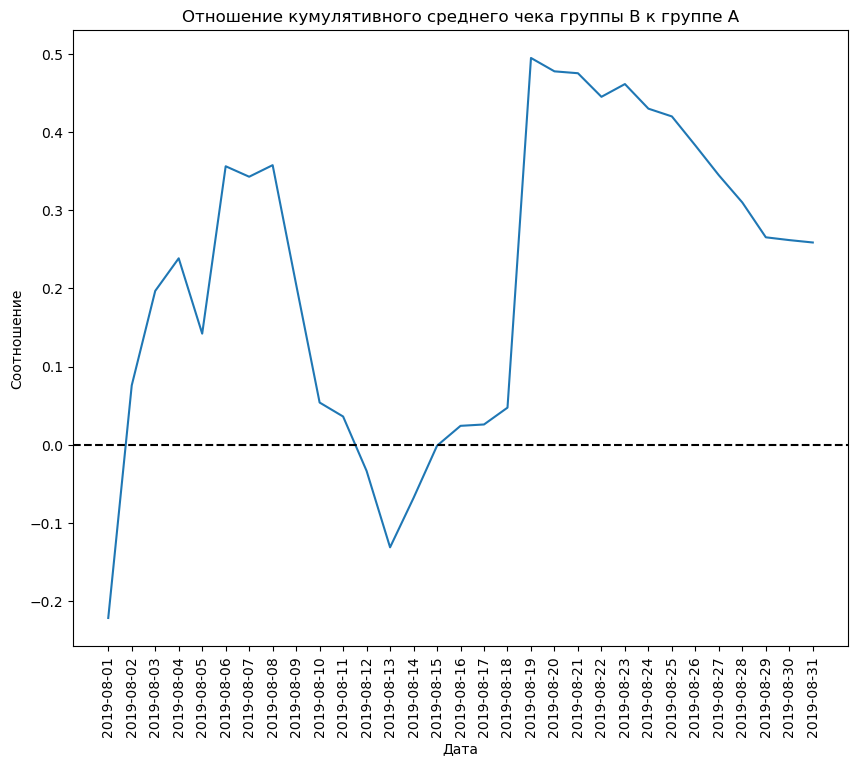

In [11]:
#посмотрим, как соотносятся средние чеки обеих групп
cumulative_merged = cumulative_A.merge(cumulative_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize = (10,8))
plt.plot(cumulative_merged['date'], (cumulative_merged['revenueB']/cumulative_merged['ordersB'])\
/(cumulative_merged['revenueA']/cumulative_merged['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Отношение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Соотношение')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()

Есть резкие скачки в середине месяца, однако группа B все же выглядит перспективнее группы A. 

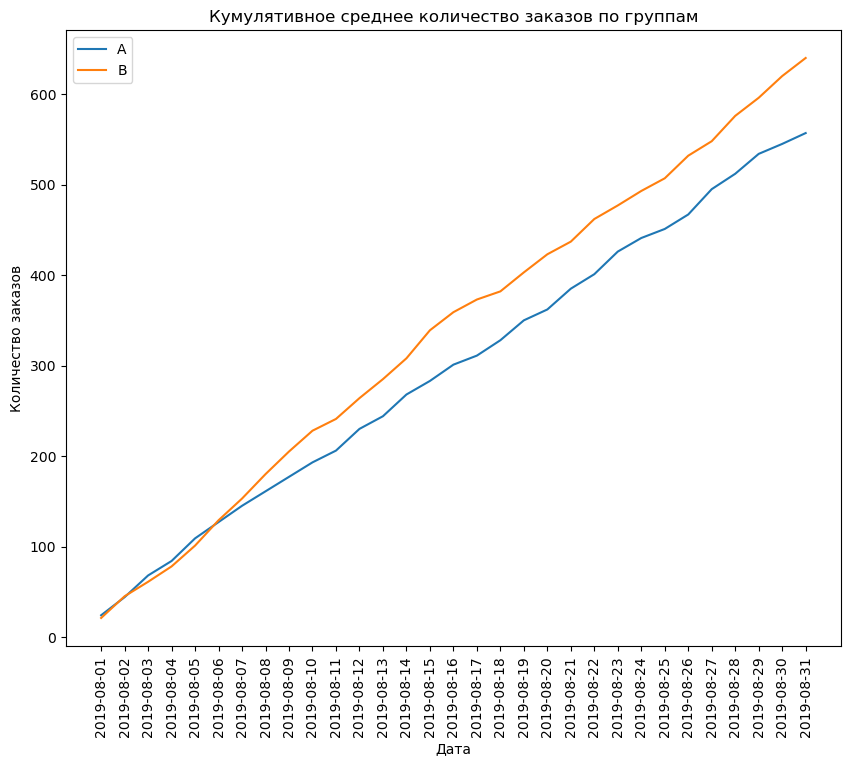

In [12]:
#посмотрим на количество заказов по группам
plt.figure(figsize = (10,8))
plt.plot(cumulative_A['date'], cumulative_A['orders'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['orders'], label='B')

plt.legend() 
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()

Количество заказов равномерно растет, причем заказов в группе B снова больше. Этот график похож на график кумулятивной выручки по группам, однако последний имеет больше выбросов. Можно сделать вывод, что они связаны не с резким ростом количества заказов, а с увеличением их суммы. 

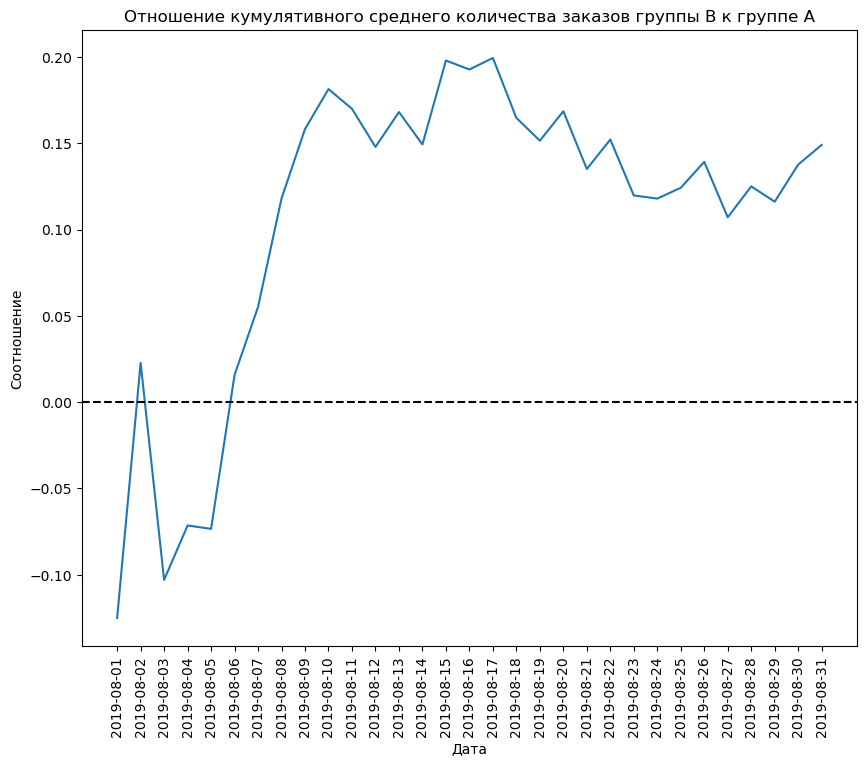

In [13]:
#посмотрим на отношение количества заказов группы B к группе A
plt.figure(figsize = (10,8))
plt.plot(cumulative_merged['date'], (cumulative_merged['ordersB'])/(cumulative_merged['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Отношение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Соотношение')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()

Данный график подтверждает предыдущий: количество заказов в группе B ниже, чем в группе A только в начале месяца, затем идет резкий скачок, и более-менее равномерное распределение. По такому графику уже можно сделать вывод о том, что группа B для нас предпочтительнее. 


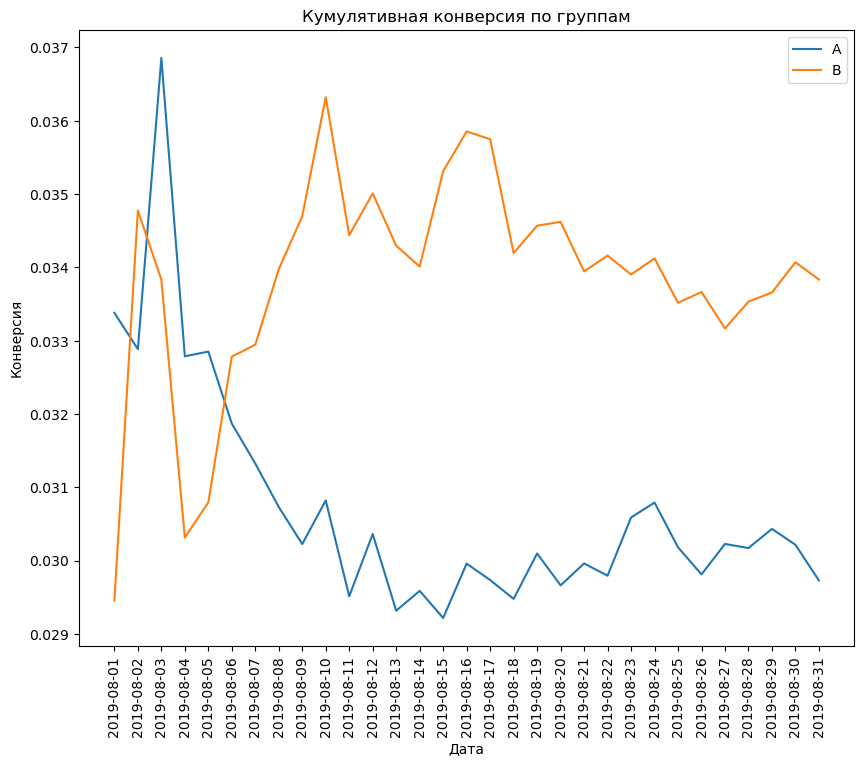

In [14]:
#посмотрим на кумулятивную конверсию
plt.figure(figsize = (10,8))
plt.plot(cumulative_A['date'], cumulative_A['conversion'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['conversion'], label='B')

plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()

Значения группы B, как и ранее, ниже в начале месяца, затем резко поднимаются. Конверсии по обеим группам еще не зафиксировались, но на данный момент группа B стабильно выше. 

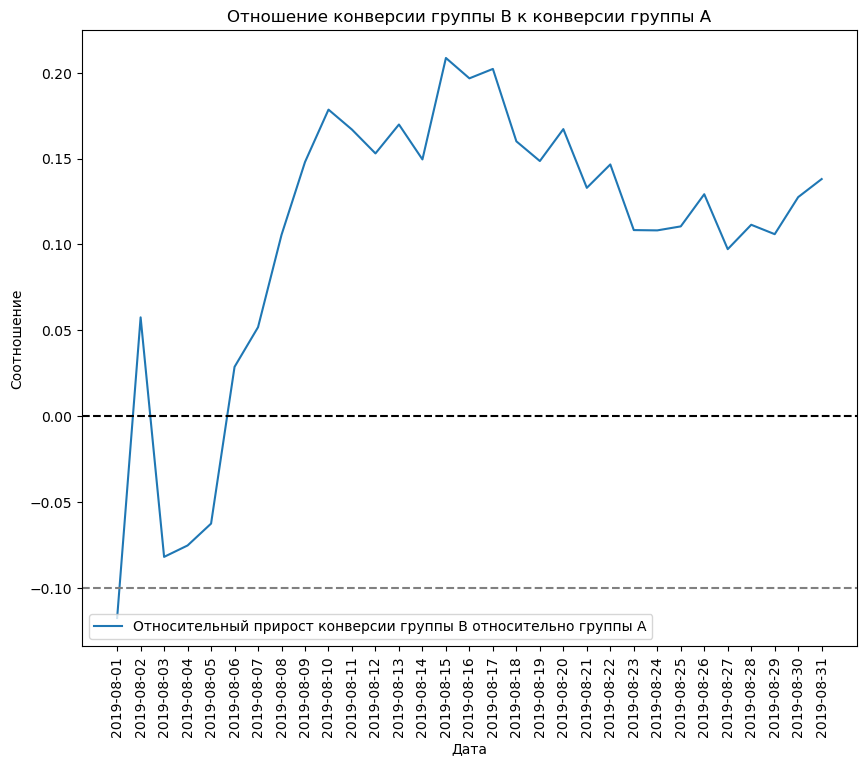

In [15]:
#посмотрим на соотношение групп по конверсиям
plt.figure(figsize = (10,8))
plt.plot(cumulative_merged['date'], cumulative_merged['conversionB']/cumulative_merged['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend(loc = 'lower left')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Соотношение')
plt.title('Отношение конверсии группы B к конверсии группы A')
plt.xticks(cumulative_A['date'], rotation='vertical')
plt.show()

Как и на прошлых графиках, группа B вырывается вперед достаточно быстро: буквально в первые дни тестирования.

**Выводы по кумулятивным метрикам:**
1. Группа B оказалась очень перспективной и выручке, и по среднему чеку, и по количеству заказов, и по конверсии. 
2. Количество заказов и выручка растут практически равномерно в обеих группах, в группе B показатели выше. 
3. Средний чек также выше у второй группы, однако значения пока не стабилизировались, есть сильные выбросы в начале и середине месяца (в некоторые периоды даже ниже, чем у первой группы).
4. Конверсия становится более-менее равномерной к концу месяца, показатели группы B снова выше. Если верить этой тенденции, сильных скачков в дальнейшем уже не будет, и можно на данном этапе признать вторую группу более перспективной. 

##### Анализ выбросов 

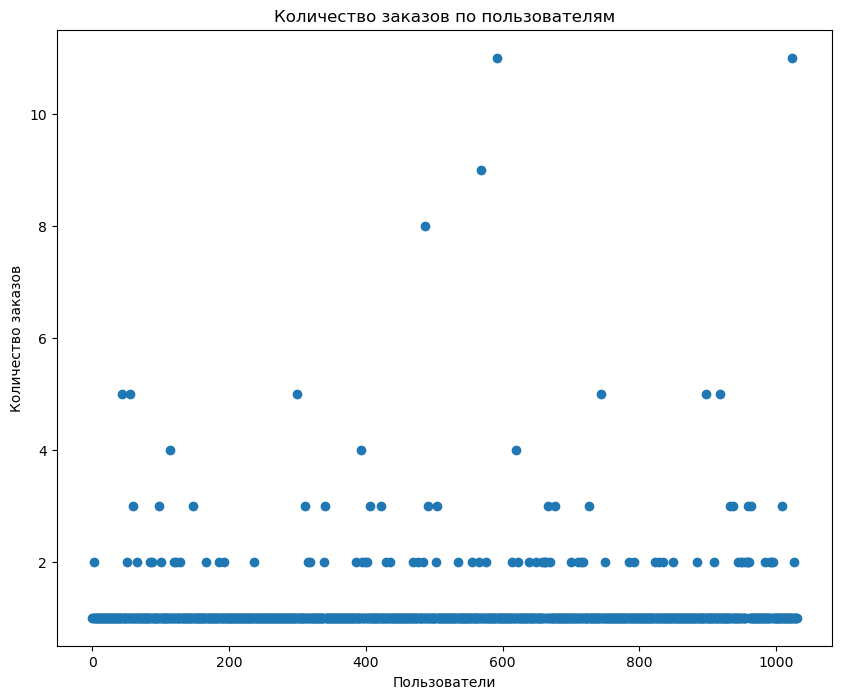

In [16]:
#посмотрим на количество заказов по каждому пользователю
order_cnt = orders.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})
order_cnt.columns = ['user_id', 'orders']

x_values = pd.Series(range(0,len(order_cnt)))
plt.figure(figsize = (10,8))
plt.scatter(x_values, order_cnt['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

У большинства пользователей только один заказ, также есть небольшое количество людей с 2-5 заказами, и единичные случаи - более 8 заказов. 

In [17]:
#посчитаем перцентили, чтобы точно определить аномалии
print(np.percentile(order_cnt['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли более 2 заказов, 4 заказа и выше было только у 1% пользователей. Можно сделать вывод, что более 2 заказов - это аномалии, которые будут влиять на качество анализа.  

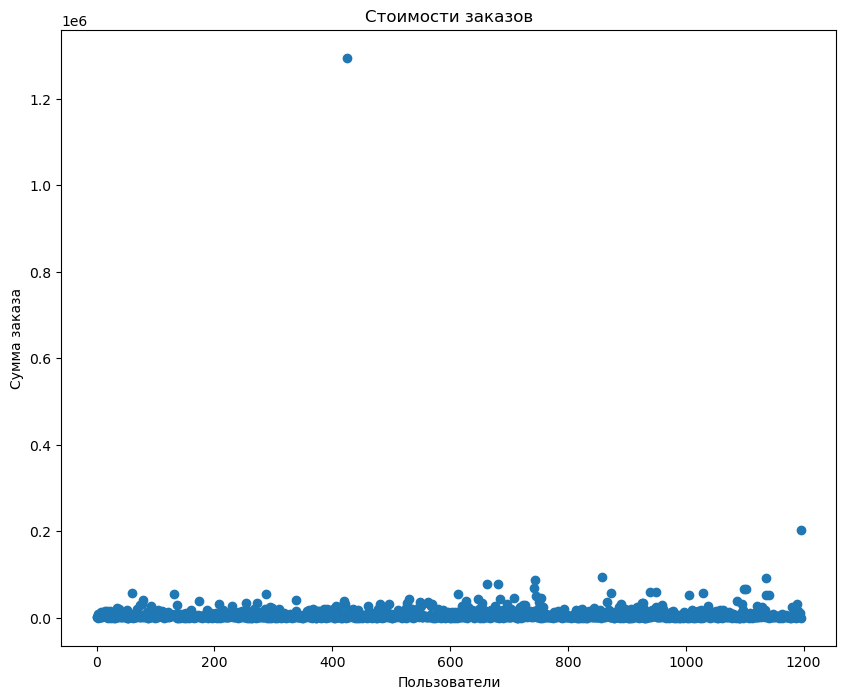

584          50
1091         50
756          50
459          50
1013         60
         ...   
744       86620
1136      92550
858       93940
1196     202740
425     1294500
Name: revenue, Length: 1197, dtype: int64

In [18]:
#проанализируем стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (10,8))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.show()

orders['revenue'].sort_values()

По графику видно, что большая часть заказов не превышает 100 тысяч, есть только пара выбросов в районе 200 тысяч и более 1,2 миллиона. 

In [19]:
#посчитаем перцентили
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Только у 1% заказы свыше 58 тысяч. 95% людей совершали заказы не более, чем на 28000, эту цифру можно взять как верхнюю границу для исследований. 

**Выводы по выбросам:**

В данных есть несколько сильно выбивающихся значений. Для дальнейших исследований возьмем пользователей, у которых было не более 2 заказов, либо их сумма не превышала 28000. 

##### Определение статистической значимости

Посмотрим, как отличаются результаты "сырых" данных от тех, которые мы очистим от найденных аномалий. 

Текущие гипотезы: 
1. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве между группами есть.
2. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [20]:
#посмотрим сначала на число заказов по группам в "сырых" данных

#разобьем данные о пользователях и заказах на группы A и B
orders_by_users_A = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_users_B.columns = ['user_id', 'orders']

#подготовим выборки с количеством заказов на пользователя
visitors_daily_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_A']

visitors_daily_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_B']


sampleA = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(visitors_daily_A['visitors_A']\
.sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(visitors_daily_B['visitors_B']\
.sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)


print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Соотношение среднего количества заказов:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if stats.mannwhitneyu(sampleA, sampleB)[1]<0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

P-value: 0.017
Соотношение среднего количества заказов: 0.138
Отвергаем нулевую гипотезу


Судя по "сырым" данным, нулевая гипотеза (различий в среднем количестве заказов между группами нет) отвергается: количество заказов во второй немного выборке больше, чем в первой. 

In [21]:
#посчитаем статистическую значимость различий в среднем чеке по "сырым" данным
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
orders[orders['group']=='B']['revenue'])[1]))

print('Соотношение средних чеков:','{0:.3f}'.format(orders[orders['group']=='B']['revenue']\
    .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]<0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value: 0.729
Соотношение средних чеков: 0.259
Не получилось отвергнуть нулевую гипотезу


P-value выше 0,05, следовательно, оснований для отвержения нулевой гипотезы (различий в среднем чеке между группами нет) нет.

Посмотрим, изменятся ли результаты в отфильтрованных данных. 
Примем за аномалии пользователей, у которых более 2 заказов, либо их стоимость выше 28000. 

In [22]:
#поместим эти числа в переменные, чтобы была возможность быстро поменять их
order_anomaly = 2
revenue_anomaly = 28000

abnormal_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > order_anomaly]['user_id'],
orders_by_users_B[orders_by_users_B['orders'] > 2]['user_id'],],axis=0,)

abnormal_revenue = orders[orders['revenue'] > revenue_anomaly]['visitor_id']

abnormal_users = (
pd.concat([abnormal_orders, abnormal_revenue], axis=0)
.drop_duplicates()
.sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего у нас 74 аномальных пользователя. Посмотрим, насколько они повлияли на результаты теста. 

Текущие гипотезы:

Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве между группами есть.
Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [23]:
#составим "чистые" выборки
filtered_A = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],
pd.Series(0,index=np.arange(visitors_daily_A['visitors_A'].sum() - len(orders_by_users_A['orders'])),name='orders',),],axis=0,)

filtered_B = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],
pd.Series(0,index=np.arange(visitors_daily_B['visitors_B'].sum() - len(orders_by_users_B['orders'])),name='orders',),],axis=0,)

#посчитаем статистическую значимость по среднему количеству заказов в новых выборках
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(filtered_A, filtered_B)[1]))
print('Соотношение среднего количества заказов:', '{0:.3f}'.format(filtered_B.mean()/filtered_A.mean()-1)) 

if stats.mannwhitneyu(filtered_A, filtered_B)[1]<0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value: 0.013
Соотношение среднего количества заказов: 0.173
Отвергаем нулевую гипотезу


P-value меньше 0,05, следовательно, есть основания для отвержения нулевой гипотезы (различий в среднем количестве заказов между группами нет), как и в случае с "сырыми" данными. Соотношение групп B и A стало чуть больше, однако не влияет на конечный результат: различия в среднем количестве заказов между группами есть, в группе B заказов оказалось больше. 

In [24]:
#проверим средний чек

print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],)[1]))

print('Соотношение средних чеков:', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()/ 
orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()- 1)) 

if stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id']\
    .isin(abnormal_users)),)]['revenue'],)[1]<0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value: 0.738
Соотношение средних чеков: -0.020
Не получилось отвергнуть нулевую гипотезу


По чистым данным также не удалось отвергнуть нулевую гипотезу, это значит, что средние чеки не различаются по группам. Соотношение средних чеков стало отрицательным, видимо, именно в группе были были те самые аномально дорогие заказы, которые искажали результаты. 

**Выводы по статистической значимости:**

1. Гипотеза о различиях в среднем количестве заказов имеет основания для подтверждения и на "сырых", и на чистых данных: в группе B заказов оказалось немного больше (на 13 или 17% соотвественно).
2. Гипотеза о различиях в среднем чеке между группами может быть отвержена. 

### Выводы

В ходе исследования была проведена приоритизация гипотез и выбраны **три самые перспективные** в зависимости от силы влияния изменений, уверенности в изменении, затрат и охвата пользователей:

7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
6.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

По кумулятивным метрикам **группа B** выигрывает по всем параметрам: выручка, средний чек, количество заказов, конверсия. В обоих группах есть резкие скачки и аномалии, за рассматриваемый период бывали дни, когда показатели второй группы падали ниже, чем у первой, однако к концу месяца они снова поднимались выше. В таком разрезе группа B выглядит очень перспективно, хотя показатели еще не выровнялись, и вероятность новых скачков есть. 

В данных есть выбросы: 74 аномальных пользователей, которые совершали большое число покупок (больше 2), либо их заказы были слишком дорогими (выше 28000, это больше, чем у 95% основной массы пользователей).

Несмотря на большое количество выбросов, различия в выводах по гипотезам нет: 
1. Гипотеза о том, что различий в среднем количестве заказов между группами нет, может быть отвергнута.
2. Гипотеза о том, что различий в среднем чеке заказов между группами нет, не может быть отвергнута. 

Среднее количество заказов в группе B, согласно чистым данным, выше на 17%. Средний чек в этой группе зависит от чистоты данных и подвержен влиянию выбросов. В чистых данных средний чек чуть ниже: на 2%. 

**Итог**:
* Основные показатели группы B выше
* При очищении данных средний чек второй группы незначительно ниже
* Тестирование идет всего месяц, данные все еще колеблются в обеих группах

Из всего вышеперечисленного можно принять решение о **продолжении теста**, чтобы еще немного понаблюдать за динамикой. 
